# Dfsu - Vertical Profile
This notebooks demonstrates plotting of vertical profile dfsu. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png')

from mikeio import Dfsu

C:\Users\JAN\AppData\Local\Temp/ipykernel_25764/4178658874.py:5: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('png')


In [2]:
filename = "../tests/testdata/oresund_vertical_slice.dfsu"
dfs = Dfsu(filename)
dfs

DfsuVerticalProfileSigmaZ
Number of elements: 441
Number of nodes: 550
Projection: UTM-33
Number of sigma layers: 4
Max number of z layers: 5
Items:
  0:  Z coordinate <ItemGeometry3D> (meter)
  1:  Temperature <Temperature> (degree Celsius)
  2:  Salinity <Salinity> (PSU)
Time: 3 steps with dt=10800.0s
      1997-09-15 21:00:00 -- 1997-09-16 03:00:00

In [3]:
ds = dfs.read()

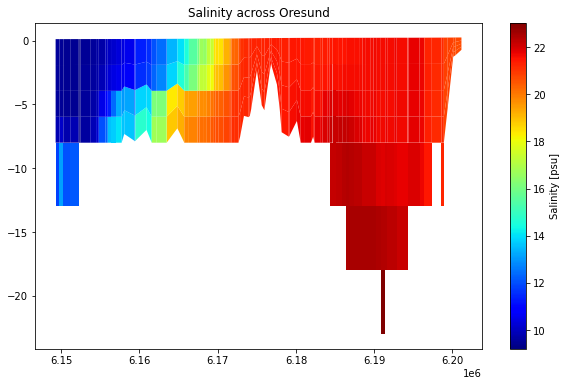

In [4]:
time_step = 1
dat = ds['Salinity'][time_step, :]
dfs.plot_vertical_profile(dat, time_step=time_step, title='Salinity across Oresund', label='Salinity [psu]', figsize=(10,6));

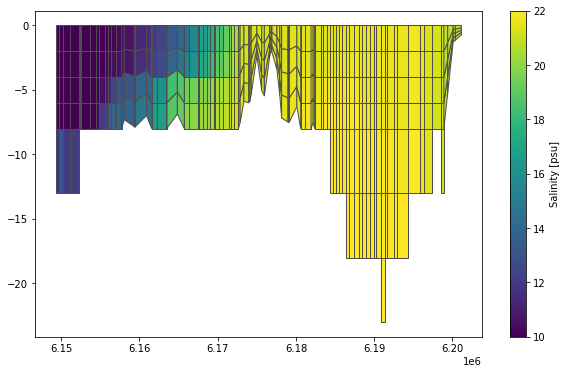

In [5]:
time_step = 1
dat = ds['Salinity'][time_step, :]
dfs.plot_vertical_profile(dat, label='Salinity [psu]', cmin=10, cmax=22, cmap='viridis', edge_color="0.3", figsize=(10,6));

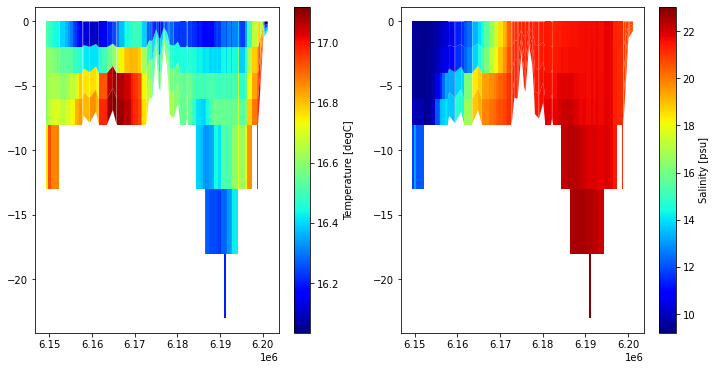

In [6]:
fig, ax = plt.subplots(1,2,figsize=(12,6))

dat = ds['Temperature'][time_step, :]
dfs.plot_vertical_profile(dat, label='Temperature [degC]', ax=ax[0]);

dat = ds['Salinity'][time_step, :]
dfs.plot_vertical_profile(dat, label='Salinity [psu]', ax=ax[1]);